# MALL CUSTOMER SEGMENTATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load and preprocess data

In [2]:
# Load and preprocess your dataset
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
#Data Cleaning
data.drop('CustomerID',axis=1,inplace=True)

In [23]:
#splitting the dataset by droping some of their column
X = data.drop(columns=['Age', 'Spending Score (1-100)'])
#or we can also create a new data set by assigning column to it
y = data['Spending Score (1-100)']

X

,Gender,Annual Income (k$),Cluster
0,Male,15,4
1,Male,15,2
2,Female,16,4
3,Female,16,2
4,Female,17,4
...,...,...,...
195,Female,120,1
196,Female,126,3
197,Male,126,1
198,Male,137,3


In [24]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

# Feature Engineering

In [6]:
# Feature selection and engineering
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Feature Standardization

In [7]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Clustering Algorithm

In [13]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
data['Cluster']

C:\Users\ELCOT\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ELCOT\anaconda32\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

# Data Visualization

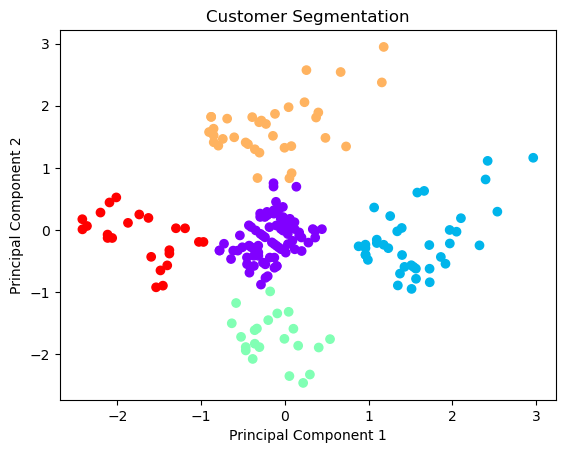

In [11]:
# Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Data Interpretation

In [12]:
# Interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=selected_features)
print(cluster_df)

   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043
